In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import pickle

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [2]:
#importing sms-spam-message detection dataset
df = pd.read_csv("data/datasets_483_982_spam.csv", encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
#drop nan values columns
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)

#rename columns
df.rename(columns={"v1":"label","v2":"messages"}, inplace=True)

In [4]:
df.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
len(df)

5572

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
#creat a new column length for visualizing
df["len"] = df["messages"].apply(len)
df.head()

,label,messages,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [9]:
#check the max length message
df["len"].max()

910

In [10]:
#print message
df[df["len"]==910]["messages"].loc[1084]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

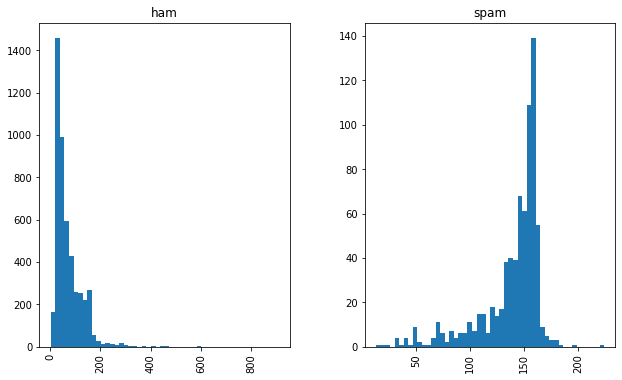

In [11]:
df.hist(column="len", by="label",bins=50, figsize=(10,6));

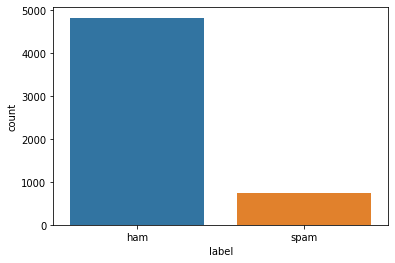

In [12]:
sns.countplot(df["label"]);

In [13]:
#droping length column
df.drop("len", axis=1, inplace=True)

In [14]:
#checking is there any blank message
blank = []

for ind, lb, mess in df.itertuples():
    if type(mess) == str:
        if mess.isspace():
            blank.append(ind)
            
blank

[]

In [15]:
ps = PorterStemmer()
message = []

for i in range(0,df.shape[0]):
    #removing punctuation from messages
    nopunc = [char for char in df["messages"][i] if char not in string.punctuation]
    
    #Joining entire the non-punctuation messages
    nopunc = ''.join(nopunc)
    
    #converting entire messages into lower case
    words = nopunc.lower()
    
    #spliting the messages
    words = words.split()
    
    #removing the stopwords
    clean_mess = [word for word in words if word not in set(stopwords.words('english'))]
    
    #stemming the words
    word = [ps.stem(word) for word in clean_mess]
    
    #join stemming words
    word = " ".join(word)
    
    #appending entire words in message
    message.append(word)

In [16]:
count = CountVectorizer()

In [17]:
X = count.fit_transform(message)
y = pd.get_dummies(df["label"],drop_first=True).values


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#model building 

model = MultinomialNB()

model.fit(X_train, y_train)

C:\Users\Abhishek\Desktop\Project\evn\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MultinomialNB()

In [20]:
#Creating a pickle file for Tfidfvectorizer

pickle.dump(count, open("Count-vector.pkl","wb"))

In [21]:
model.score(X_test, y_test)

0.9775784753363229

In [22]:
#Creating a pickle file for model

pickle.dump(model, open("spam-message-detection.pkl", "wb"))